## Analyzing Stock Price Correlations python python

In [1]:
## %pip install pandas_datareader

In [40]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy


In [8]:
start  = dt.datetime(2018,1,1)
end = dt.datetime.now()

In [43]:
data = web.DataReader(ticker, "yahoo",start,end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-20,359.989990,353.309998,354.600006,359.369995,8697700,359.369995
2021-08-23,365.690002,359.100006,359.440002,363.350006,10942000,363.350006
2021-08-24,367.959991,361.839996,363.660004,365.510010,9235100,365.510010
2021-08-25,370.859985,365.399994,365.600006,368.390015,9684500,368.390015
2021-08-26,369.440002,364.130005,368.380005,364.380005,7888700,364.380005


In [42]:
tickers = ["FB", "GS", "NVDA", "MSFT", "TSLA", "AAPL", "CCL", "BA"]
colnames = []
for ticker in tickers:
   data = web.DataReader(ticker, "yahoo",start,end)
   if len(colnames) == 0:
        combined = data[['Adj Close']].copy()
        
   else:
        combined = combined.join(data['Adj Close'])
   colnames.append(ticker)
   combined.columns = colnames

ValueError: columns overlap but no suffix specified: Index(['Adj Close'], dtype='object')

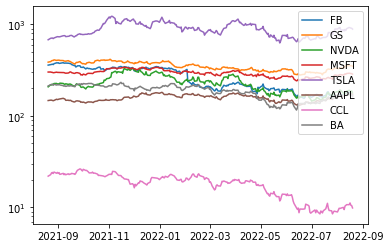

In [46]:
plt.yscale("log")
for ticker in tickers:
    plt.plot(combined[ticker], label = ticker)
plt.legend(loc = "upper right")
plt.show()
    

                 FB        GS      NVDA      MSFT      TSLA      AAPL  \
FB         1.000000  0.462317  0.616531  0.599963  0.429780  0.576877   
GS         0.462317  1.000000  0.528029  0.515626  0.381444  0.545139   
NVDA       0.616531  0.528029  1.000000  0.739299  0.641466  0.718162   
MSFT       0.599963  0.515626  0.739299  1.000000  0.580934  0.779962   
TSLA       0.429780  0.381444  0.641466  0.580934  1.000000  0.642108   
AAPL       0.576877  0.545139  0.718162  0.779962  0.642108  1.000000   
CCL        0.483755  0.523217  0.545401  0.430960  0.469839  0.483517   
BA         0.425732  0.527683  0.533558  0.388059  0.484833  0.513245   
Adj Close  1.000000  0.462317  0.616531  0.599963  0.429780  0.576877   

                CCL        BA  Adj Close  
FB         0.483755  0.425732   1.000000  
GS         0.523217  0.527683   0.462317  
NVDA       0.545401  0.533558   0.616531  
MSFT       0.430960  0.388059   0.599963  
TSLA       0.469839  0.484833   0.429780  
AAPL       

<AxesSubplot:>

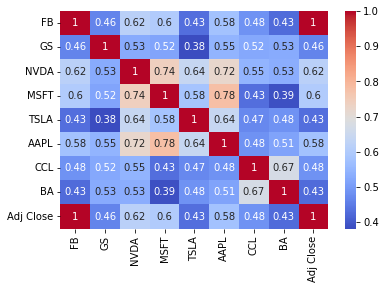

In [51]:
corr_data  = combined.pct_change().corr(method = "pearson")
print(corr_data)
sns.heatmap(corr_data, annot = True, cmap = "coolwarm")